## 1. Chuẩn bị dữ liệu

![alt text](https://i.imgur.com/HRhd2Y0.png)

In [170]:
import pandas as pd
import os
import traceback

# --- CẤU HÌNH ---
data_folder = "./data/" 
# ----------------

dataframes = {}

print(f"Bắt đầu quét và đọc các tệp CSV từ thư mục: '{os.path.abspath(data_folder)}'")
print("-" * 30)

if not os.path.isdir(data_folder):
    print(f"ERROR: Không tìm thấy thư mục '{data_folder}'.")
    print("Hãy đảm bảo bạn đã tải dữ liệu vào đúng thư mục này.")
else:
    for item_name in os.listdir(data_folder):
        item_path = os.path.join(data_folder, item_name)

        if os.path.isfile(item_path) and item_name.lower().endswith(".csv"):
            print(f"Đang xử lý tệp: '{item_name}'")
            try:
                # --- Tạo tên DataFrame động (ĐÃ CẬP NHẬT) ---
                base_name = os.path.splitext(item_name)[0]

                # Loại bỏ tiền tố 'olist_'
                if base_name.startswith('olist_'):
                    name_without_prefix = base_name[len('olist_'):] # Cắt bỏ 'olist_'
                else:
                    name_without_prefix = base_name 

                # Loại bỏ hậu tố '_dataset'
                if name_without_prefix.endswith('_dataset'):
                    clean_name = name_without_prefix[:-len('_dataset')] # Cắt bỏ '_dataset'
                else:
                    clean_name = name_without_prefix 

                # Tạo tên DataFrame
                df_variable_name = f"df_{clean_name}"
                # ---------------------------------------------

                # Đọc tệp CSV vào DataFrame
                df = pd.read_csv(item_path)

                # Lưu DataFrame vào dictionary với tên đã tạo
                dataframes[df_variable_name] = df

                print(f"  -> Đã đọc thành công vào DataFrame: '{df_variable_name}' (Shape: {df.shape})")

            except Exception as e:
                # In lỗi nếu không đọc được tệp và tiếp tục với tệp tiếp theo
                print(f"  !! LỖI khi đọc tệp '{item_name}': {e}")
                traceback.print_exc()
        else:
            if os.path.isfile(item_path):
                 print(f"Bỏ qua (không phải CSV): '{item_name}'")

print("-" * 30)
print("Hoàn tất quá trình đọc dữ liệu.")

Bắt đầu quét và đọc các tệp CSV từ thư mục: '/workspaces/Brazilian-E-Commerce-Analysis/data'
------------------------------
Đang xử lý tệp: 'olist_order_reviews_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_order_reviews' (Shape: (99224, 7))
Đang xử lý tệp: 'olist_orders_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_orders' (Shape: (99441, 8))
Đang xử lý tệp: 'olist_customers_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_customers' (Shape: (99441, 5))
Đang xử lý tệp: 'olist_order_items_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_order_items' (Shape: (112650, 7))
Đang xử lý tệp: 'olist_order_payments_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_order_payments' (Shape: (103886, 5))
Đang xử lý tệp: 'olist_products_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_products' (Shape: (32951, 9))
Đang xử lý tệp: 'olist_geolocation_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_geolocation' (Shape: (1000163, 5))
Đang xử lý tệp: 'olis

## 2. Làm sạch dữ liệu

In [171]:
for i, df in enumerate(dataframes):
    print(f'{i+1}. DataFrame: {df}')
    display(dataframes[df].head())
    print('\n')

1. DataFrame: df_order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




2. DataFrame: df_orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




3. DataFrame: df_customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




4. DataFrame: df_order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




5. DataFrame: df_order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




6. DataFrame: df_products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




7. DataFrame: df_geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




8. DataFrame: df_sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP




9. DataFrame: df_product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 2.1. DataFrame: customers

In [172]:
customers = dataframes['df_customers']

In [173]:
# Dữ liệu bảng customers
display(customers.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [174]:
# Thông tin tổng quan
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


=> Bảng **customers** không có giá trị thiếu

In [175]:
# Kiểm tra dữ liệu không hợp lệ
print(f'Số lượng giá trị \'customer_zip_code_prefix\' không hợp lệ: {(customers['customer_zip_code_prefix'] < 0).sum()}')
print(f'Số thành phố: {len((customers['customer_city']).unique())}')
print(f'Số tiểu bang: {len((customers['customer_state']).unique())}')

Số lượng giá trị 'customer_zip_code_prefix' không hợp lệ: 0
Số thành phố: 4119
Số tiểu bang: 27


In [176]:
# Kiểm tra giá trị trùng lặp
print(f'Số lượng giá trị trùng lặp: {customers.duplicated().sum()}')

Số lượng giá trị trùng lặp: 0


=> Không có giá trị trùng lặp

### 2.2. DataFrame: geolocation

In [177]:
geolocation = dataframes['df_geolocation']

In [178]:
# Dữ liệu bảng
display(geolocation.head())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [179]:
# Thông tin tổng quan
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


=> Bảng không có giá trị thiếu

In [180]:
print(f'Số lượng thành phố: {len((geolocation['geolocation_city']).unique())}')
print(f'Số tiểu bang: {len((geolocation['geolocation_state']).unique())}')

Số lượng thành phố: 8011
Số tiểu bang: 27


In [181]:
# Kiểm tra giá trị trùng lặp
print(f'Số lượng giá trị trùng lặp: {geolocation.duplicated().sum()}')

Số lượng giá trị trùng lặp: 261831


In [182]:
# Loại bỏ các giá trị trùng lặp
geolocation = geolocation.drop_duplicates()
print(f'Số lượng giá trị trùng lặp: {geolocation.duplicated().sum()}')

Số lượng giá trị trùng lặp: 0


In [183]:
# Sửa lại tên bang theo ứng với các zip_code
zip_to_state = {
    2116: 'RN',
    4011: 'BA',
    21550: 'RJ',
    23056: 'RJ',
    72915: 'GO',
    78557: 'MT',
    79750: 'MS',
    80630: 'PR'
}
geolocation = geolocation.copy()
geolocation['geolocation_state'] = geolocation['geolocation_zip_code_prefix'].map(zip_to_state).fillna(geolocation['geolocation_state'])

In [184]:
geolocation = geolocation.groupby(['geolocation_zip_code_prefix', 'geolocation_state']).agg(
    geolocation_lat = ('geolocation_lat', 'mean'),
    geolocation_lng = ('geolocation_lng', 'mean')
).reset_index()
geolocation


,geolocation_zip_code_prefix,geolocation_state,geolocation_lat,geolocation_lng
0,1001,SP,-23.550227,-46.634039
1,1002,SP,-23.547657,-46.634991
2,1003,SP,-23.549000,-46.635582
3,1004,SP,-23.549829,-46.634792
4,1005,SP,-23.549547,-46.636406
...,...,...,...,...
19010,99960,RS,-27.953722,-52.025511
19011,99965,RS,-28.183372,-52.039850
19012,99970,RS,-28.343920,-51.874988
19013,99980,RS,-28.389500,-51.843122


### 2.3. DataFrame: orders items

In [185]:
orders_items = dataframes['df_order_items']

In [186]:
# Dữ liệu bảng
display(orders_items.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [187]:
# Thông tin tổng quan
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


=> Bảng không có giá trị thiếu

In [188]:
# Chuyển cột về dang datetime
orders_items['shipping_limit_date'] = pd.to_datetime(orders_items['shipping_limit_date'], errors='coerce')
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [189]:
# Kiểm tra giá trị trùng lặp
duplicate_count = orders_items.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.4. DataFrame: orders

In [190]:
orders = dataframes['df_orders']

In [191]:
# Dữ liệu bảng
display(orders.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [192]:
# Thông tin tổng quan
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [193]:
# Chuyển dữ liệu về dạng datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [194]:
# Kiểm tra giá trị trùng lặp
duplicate_count = orders_items.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.5. DataFrame: products

In [195]:
products = dataframes['df_products']

In [196]:
# Dữ liệu bảng
display(products.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [197]:
# Thông tin tổng quan
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [198]:
# Kiểm tra giá trị thiếu
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [199]:
# Kiểm tra giá trị trùng lặp
duplicate_count = products['product_id'].duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.6. DataFrame: orders payments

In [200]:
orders_payments = dataframes['df_order_payments']

In [201]:
# Dữ liệu bảng
display(orders_payments.head())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [202]:
# Thông tin tổng quan
orders_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


=> Bảng không giá trị thiếu

In [203]:
# Kiểm tra giá trị trùng lặp
duplicate_count = orders_payments.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.7. DataFrame: orders reviews

In [204]:
orders_reviews = dataframes['df_order_reviews']

In [205]:
# Dữ liệu bảng
display(orders_reviews.head())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [206]:
# Thông tin tổng quan
orders_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [207]:
# Chuyển dữ liệu về dạng datetime
orders_reviews['review_creation_date'] = pd.to_datetime(orders_reviews['review_creation_date'], errors='coerce')
orders_reviews['review_answer_timestamp'] = pd.to_datetime(orders_reviews['review_answer_timestamp'], errors='coerce')
orders_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [208]:
# Kiểm tra giá trị trùng lặp
duplicate_count = orders_reviews.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.8. DataFrame: sellers

In [209]:
sellers = dataframes['df_sellers']

In [210]:
# Dữ liệu bảng
display(sellers.head())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [211]:
# Thông tin tổng quan
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


=> Bảng không có giá trị thiếu

In [212]:
# Kiểm tra giá trị trùng lặp
duplicate_count = sellers.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.9. DataFrame: product category name translation

In [213]:
product_category_name_translation = dataframes['df_product_category_name_translation']
product_category_name_translation['product_category_name_english'] = product_category_name_translation['product_category_name_english'].replace('home_confort', 'home_comfort')

In [214]:
# Dữ liệu bảng
display(product_category_name_translation.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [215]:
# Thông tin tổng quan
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [216]:
# Kiểm tra giá trị trùng lặp
duplicate_count = product_category_name_translation.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


## 3. Phân tích hành vi tiêu dùng của khách hàng

### 3.1. Thời gian tiêu dùng

**Mục tiêu**: Nhận diện xu hướng về thời gian để hiểu thói quen mua hàng

In [217]:
# Trích xuất thời gian
orders_filtered = orders[orders['order_status'] == 'delivered'].copy() # Lọc ra những đơn hàng bị hủy (bởi khách hàng hoặc hệ thống)
orders_filtered['order_purchase_hour'] = orders_filtered['order_purchase_timestamp'].dt.hour
orders_filtered['order_purchase_date'] = orders_filtered['order_purchase_timestamp'].dt.date
orders_filtered['order_purchase_date'] = pd.to_datetime(orders_filtered['order_purchase_date'], errors='coerce')
orders_filtered['order_purchase_month'] = orders_filtered['order_purchase_timestamp'].dt.to_period('M')
orders_filtered['order_purchase_dayofweek'] = orders_filtered['order_purchase_timestamp'].dt.day_of_week

day_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
orders_filtered['order_purchase_day_name'] = orders_filtered['order_purchase_dayofweek'].map(day_map)

In [218]:
orders_filtered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_hour,order_purchase_date,order_purchase_month,order_purchase_dayofweek,order_purchase_day_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,2017-10-02,2017-10,0,Mon
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20,2018-07-24,2018-07,1,Tue
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,2018-08-08,2018-08,2,Wed
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,19,2017-11-18,2017-11,5,Sat
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21,2018-02-13,2018-02,1,Tue


#### Theo tháng

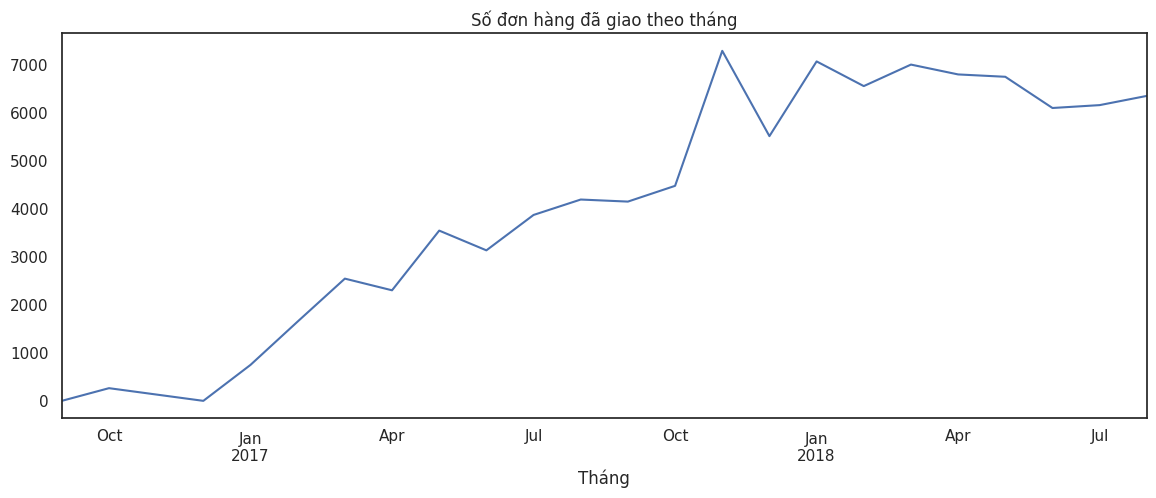

In [219]:
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo tháng
orders_filtered['order_purchase_month'].value_counts().sort_index().plot(kind='line', figsize=(14,5))
plt.title('Số đơn hàng đã giao theo tháng')
plt.xlabel('Tháng')
plt.show()

- Những tháng cuối năm 2016 có số lượng đơn rất thấp => Có thể do dữ liệu chưa được ghi nhận đầy đủ
- Số lượng đơn hàng tăng dần từ đầu năm 2017 đến tháng 11/2017
- Ghi nhận lượng đơn hàng đạt đỉnh (hơn 7000 đơn) vào tháng 11/2017 => Có thể liên quan đến dịp Black Friday 
- Lượng đơn hàng trong năm 2018 duy trì tương đối ổn định cho đến tháng 8/2018

#### Theo ngày trong tuần

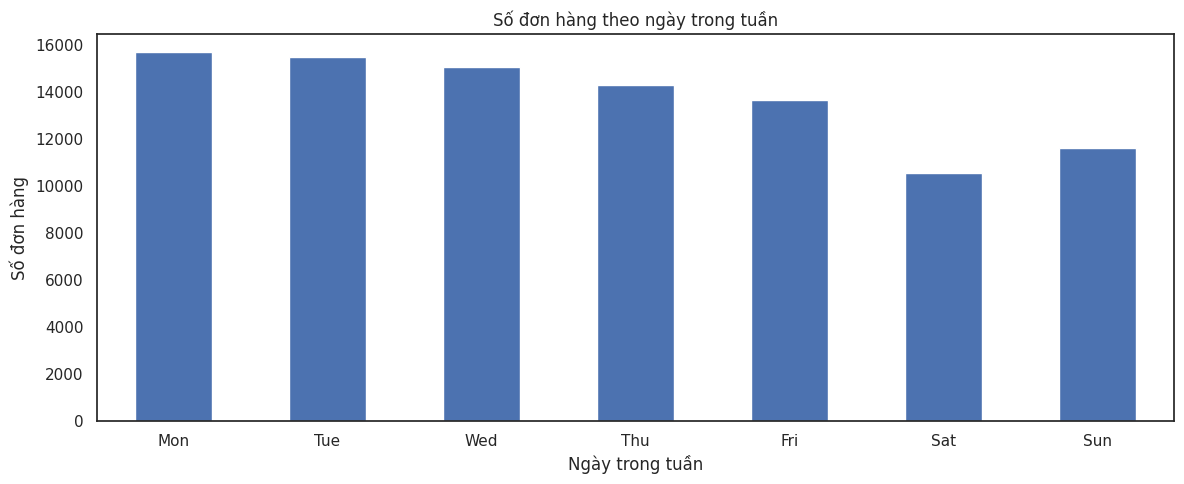

In [220]:
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo ngày trong tuần
orders_by_dayofweek = orders_filtered.groupby('order_purchase_dayofweek')['order_purchase_day_name'].value_counts().sort_index()

x_labels = orders_by_dayofweek.index.get_level_values('order_purchase_day_name').tolist()

orders_by_dayofweek.plot(kind='bar', figsize=(12, 5))
plt.title('Số đơn hàng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số đơn hàng')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0)
plt.tight_layout()
plt.show()

- Ngày thứ 2 có lượng đơn đặt hàng cao nhất (15.7k đơn), sau đó giảm dần vào các ngày tiếp theo. Thứ 7 và Chủ nhật có lượng đơn đặt hàng thấp nhất trong tuần với lần lượt 10.555 đơn vào thứ 7 và 11.635 đơn vào Chủ Nhật
- Khách hàng có xu hướng mua hàng vào các ngày trong tuần
- Việc đơn đặt hàng giảm vào cuối tuần có thể cho thấy khách hàng dành nhiều thời gian hơn có các hoạt động cá nhân, giải trí hay nghỉ ngơi => Việc mua sắm trực tuyến giảm 
- Với xu hướng khách hàng đặt đơn nhiều vào đầu tuần, Olist có thể kết hợp với các nhà bán hàng tung ra các chương trình khuyến mãi, ưu đãi đặc biệt nhằm duy trì và tăng số lượng đơn đặt hàng
- Cần có các chiến dịch kích thích mua sắm vào cuối tuần để cân bằng lượng đơn hàng, chẳng hạn như giảm giá đặc biệt, flash sale hoặc một số gói ưu đãi dành riêng cho cuối tuần

#### Theo ngày

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


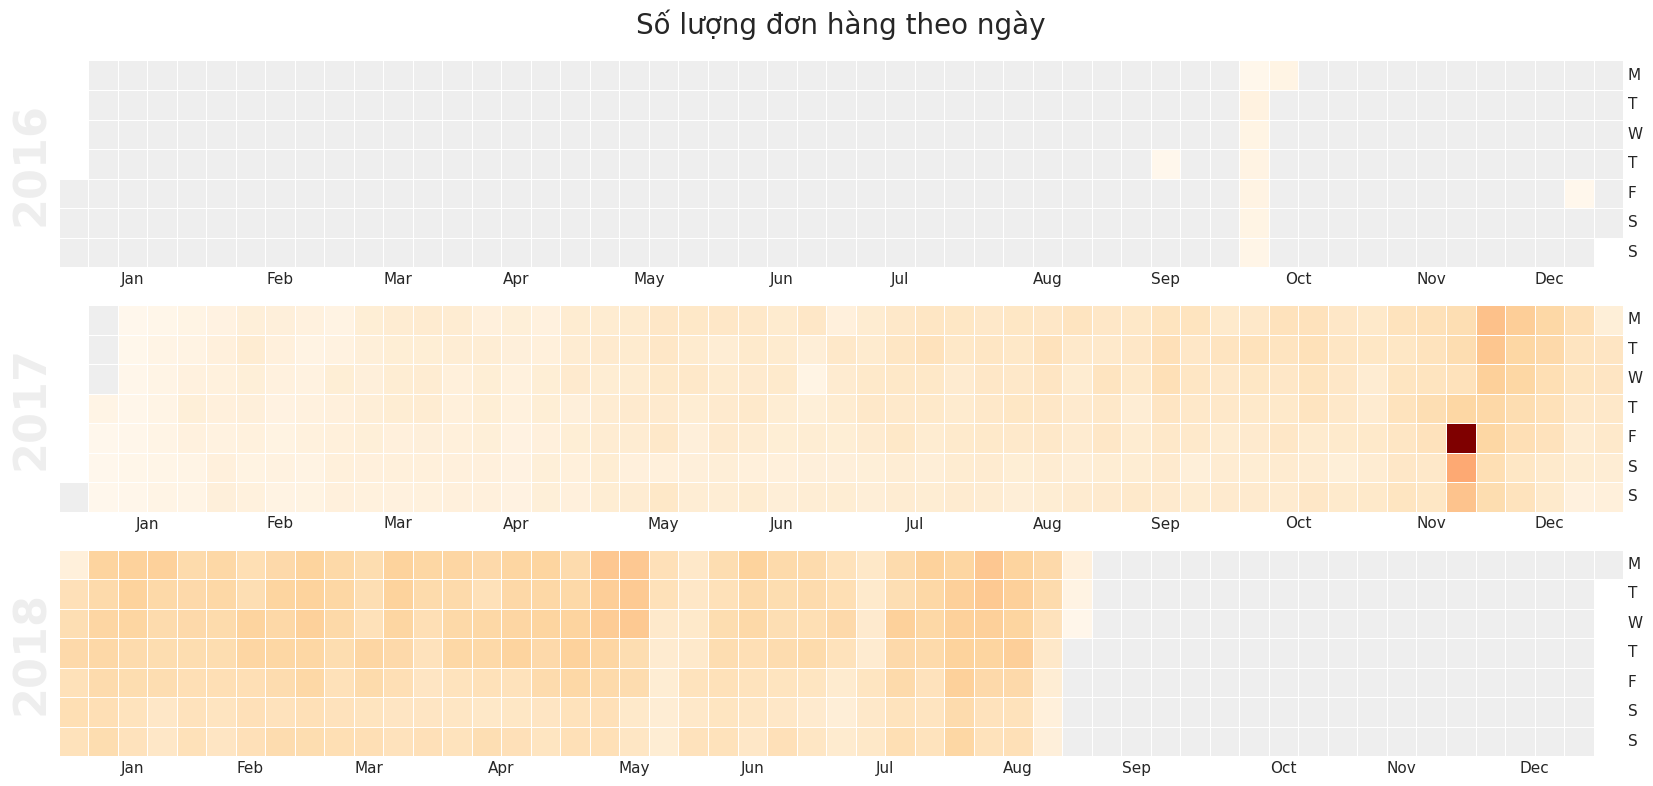

In [221]:
import pandas as pd
import calmap
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo ngày
orders_by_day = orders_filtered['order_purchase_date'].value_counts()
fig,ax = calmap.calendarplot(orders_by_day, monthticks=1, daylabels='MTWTFSS', fillcolor='#EEEEEE',
                             cmap='OrRd', linewidth=0.5, fig_kws=dict(figsize=(20,8)))

fig.suptitle('Số lượng đơn hàng theo ngày', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 1])
fig.show()

- Có một cụm màu đỏ nổi bật vào cuối tháng 11/2017 -> Đây chính là thời điểm diễn ra ngày lễ **Black Friday**
- Các ngày xung quanh **Black Friday** cũng có lượng đơn hàng cao hơn bình thường
- Các ngày cuối tuần có màu nhạt hơn so với các ngày trong tuần => Khách hàng thường có xu hướng mua hàng vào các ngày trong tuần
- Tính đến tháng 8/2018, lượng đơn hàng hàng ngày khá đồng đều và duy trì ở mức cao. Không có ngày nào nổi bật với lượng mua sắm đặc biệt lớn, ngay cả trong thời gian diễn ra lễ hội Carnival (Cuối tháng 2 - đầu tháng 3).

#### Theo giờ

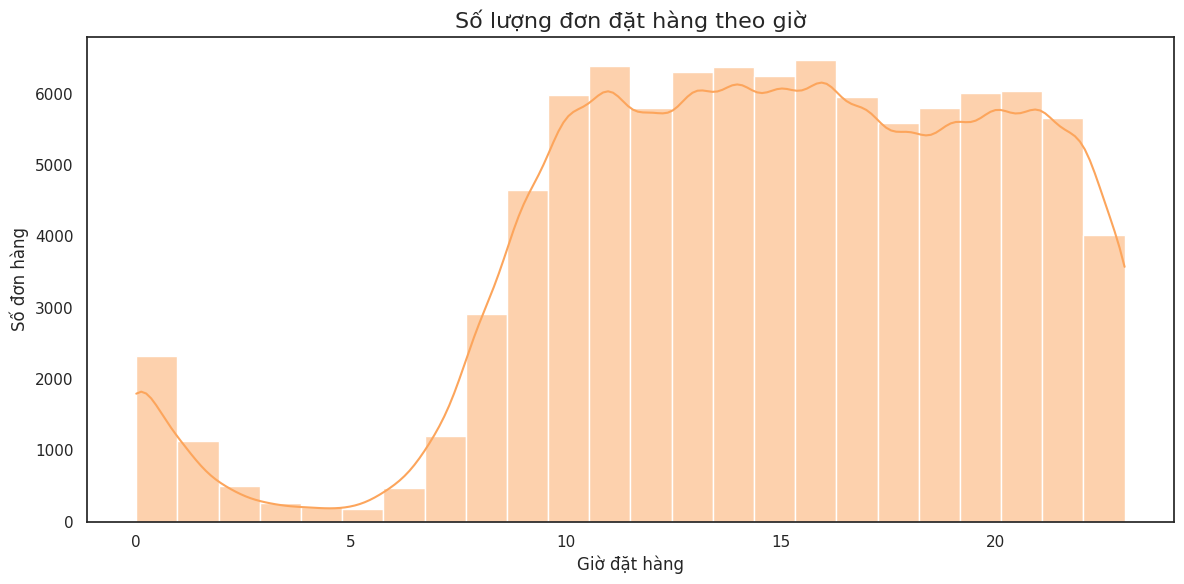

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo giờ
plt.figure(figsize=(12,6))
sns.set_theme(style="white")

sns.histplot(data=orders_filtered, x='order_purchase_hour', bins=24, kde=True, color='#fca55c')

plt.title('Số lượng đơn đặt hàng theo giờ', fontsize=16)
plt.xlabel('Giờ đặt hàng')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Hoạt động mua sắm tập trung chủ yếu vào ban ngày và buổi tối
- Vào ban đêm và sáng sớm, hoạt động mua sắm gần như bằng 0
- Số lượng đơn hàng bắt đầu tăng đáng kể từ khoảng 8h sáng và tăng rất nhanh cho đến 11h trưa
- Từ 13h đến khoảng 17h, số lượng đơn đặt hàng luôn ở mức cao và ổn định (luôn duy trì ở mức 6000 đơn/giờ). 
- Lượng đơn hàng có xu hướng giảm nhẹ vào khoảng 16h-17h, thời điểm thường trùng với giờ tan làm. Có thể việc di chuyển và kết thúc ngày làm việc đã tạm thời làm gián đoạn hoạt động mua sắm của khách hàng
- Sau 18h số lượng đơn hàng ghi nhận được có giảm nhẹ so với ban ngày nhưng vẫn duy trì ở mức cao (khoảng 5500 đơn) cho đến 23h 
- Sau 23h lượng đơn hàng bắt đầu giảm mạnh
- Có một lượng đơn hàng đáng chú ý vào lúc 0 giờ (nửa đêm), cao hơn hẳn so với các giờ từ 1h đến 6h sáng, sau đó giảm nhanh chóng.
 
    => Các chương trình khuyến mãi kết thúc muộn vào nửa đêm, thúc đẩy mua hàng vào phút chót.

### 3.2. Giá trị & Tần xuất mua hàng

**Mục tiêu**: Hiểu khả năng chi tiêu của khách hàng, nhận diện khách hàng trung thành

#### Giá trị đơn hàng trung bình

In [223]:
delivered_orders = orders_filtered.merge(orders_items, how='inner', on='order_id')
delivered_orders = delivered_orders[delivered_orders['order_purchase_month'] >= pd.Period('2017-01', freq='M')]

delivered_orders['revenue'] = (delivered_orders['price'] + delivered_orders['freight_value']) * delivered_orders['order_item_id'] # Tổng giá trị của một đơn hàng
revenue_by_orders_id = delivered_orders.groupby(['order_id'])[['price', 'freight_value' ,'revenue']].sum().reset_index() # Tổng giá trị của từng đơn hàng
total_revenue = revenue_by_orders_id['revenue'].sum() # Tổng giá trị tất cả các đơn hàng đã giao
orders_count = revenue_by_orders_id.shape[0] # Số lượng đơn đặt hàng
avg_orders_value = total_revenue / orders_count # Doanh thu trung bình trên mỗi đơn hàng

print(f'Tổng doanh thu: R$ {total_revenue:,.2f}')
print(f'Số lượng đơn hàng đã giao: R${orders_count:,}')
print(f'Doanh thu trung bình mỗi đơn hàng: R${avg_orders_value:,.2f}')
print(f'Đơn hàng có giá trị nhỏ nhất: R${min(revenue_by_orders_id['revenue']):,}')
print(f'Đơn hàng có giá trị cao nhất: R${max(revenue_by_orders_id['revenue']):,}')

Tổng doanh thu: R$ 17,526,238.28
Số lượng đơn hàng đã giao: R$96,211
Doanh thu trung bình mỗi đơn hàng: R$182.16
Đơn hàng có giá trị nhỏ nhất: R$9.59
Đơn hàng có giá trị cao nhất: R$61,488.36


In [224]:
# AOV thay đổi theo tháng như thế nào ?

monthly_stats = delivered_orders.groupby('order_purchase_month').agg(
            order_count = ('order_id', 'nunique'),
            total_revenue = ('revenue', 'sum')
).reset_index()
monthly_stats['AOV'] = monthly_stats['total_revenue'] / monthly_stats['order_count']
display(monthly_stats)

,order_purchase_month,order_count,total_revenue,AOV
0,2017-01,750,151780.36,202.373813
1,2017-02,1653,298124.69,180.353714
2,2017-03,2546,460292.94,180.790628
3,2017-04,2303,423449.36,183.868589
4,2017-05,3546,632846.13,178.467606
5,2017-06,3135,538167.08,171.664140
6,2017-07,3872,639885.33,165.259641
7,2017-08,4193,742775.22,177.146487
8,2017-09,4150,848690.00,204.503614
9,2017-10,4478,874350.33,195.254652


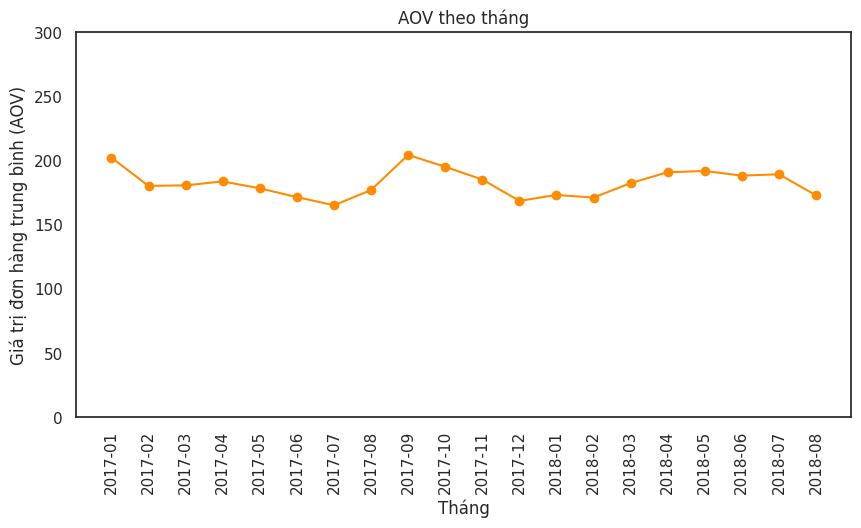

In [225]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_stats['order_purchase_month'].astype(str), monthly_stats['AOV'], marker='o', color='darkorange')
plt.title('AOV theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Giá trị đơn hàng trung bình (AOV)')
plt.xticks(rotation=90)
plt.ylim(0, 300)
plt.show()


- Năm 2017:
    - AOV bắt đầu cao ở tháng 1 với R$202.37, sau đó giảm dần trong các tháng tiếp theo, đặc biệt chạm đáy vào tháng 7 (R$165.26).
    - Từ tháng 8 đến tháng 10, AOV hồi phục, đạt đỉnh mới vào tháng 9 (R$204.50).
    - Tuy nhiên, trong mùa lễ hội (tháng 11–12), AOV lại giảm nhẹ, cho thấy khách có xu hướng mua nhiều sản phẩm giá thấp hơn hoặc săn hàng khuyến mãi.
- Năm 2018:
    - AOV tăng dần từ tháng 1 (R$173.31) đến tháng 5 (R$192.00), cho thấy sự ổn định và khả năng chi tiêu tăng của khách hàng.
    - Từ tháng 6 trở đi, AOV vẫn giữ mức tương đối cao và ổn định quanh R$188–189, giảm nhẹ vào tháng 8 (R$173.01).
    
=> AOV biến động nhẹ theo mùa, có xu hướng giảm vào giữa năm và tăng trở lại vào cuối năm. Tuy nhiên, trong mùa mua sắm cuối năm, AOV không tăng đột biến — điều này có thể do người dùng mua hàng giá thấp hoặc đa dạng sản phẩm hơn thay vì chi nhiều cho một đơn hàng.

#### Phân loại đơn hàng theo giá trị

In [226]:
def revenue_group(value):
    if value < 50:
        return '< 50'
    elif value <= 100: 
        return '50 - 100'
    elif value <= 500:
        return '100 - 500'
    elif value <= 1000:
        return '500 - 1000'
    else:
        return '> 1000'
    
revenue_by_orders_id['revenue_group'] = revenue_by_orders_id['revenue'].apply(revenue_group)

In [227]:
revenue_summary_by_group = revenue_by_orders_id.groupby('revenue_group').agg(
    orders_by_group=('revenue_group', 'count'),
    revenue_by_group=('revenue', 'sum')
)

,orders_by_group,revenue_by_group
revenue_group,,
< 50,16251,598408.99
50 - 100,28298,2073210.02
100 - 500,46103,9053629.36
500 - 1000,3895,2643233.61
> 1000,1664,3157756.30


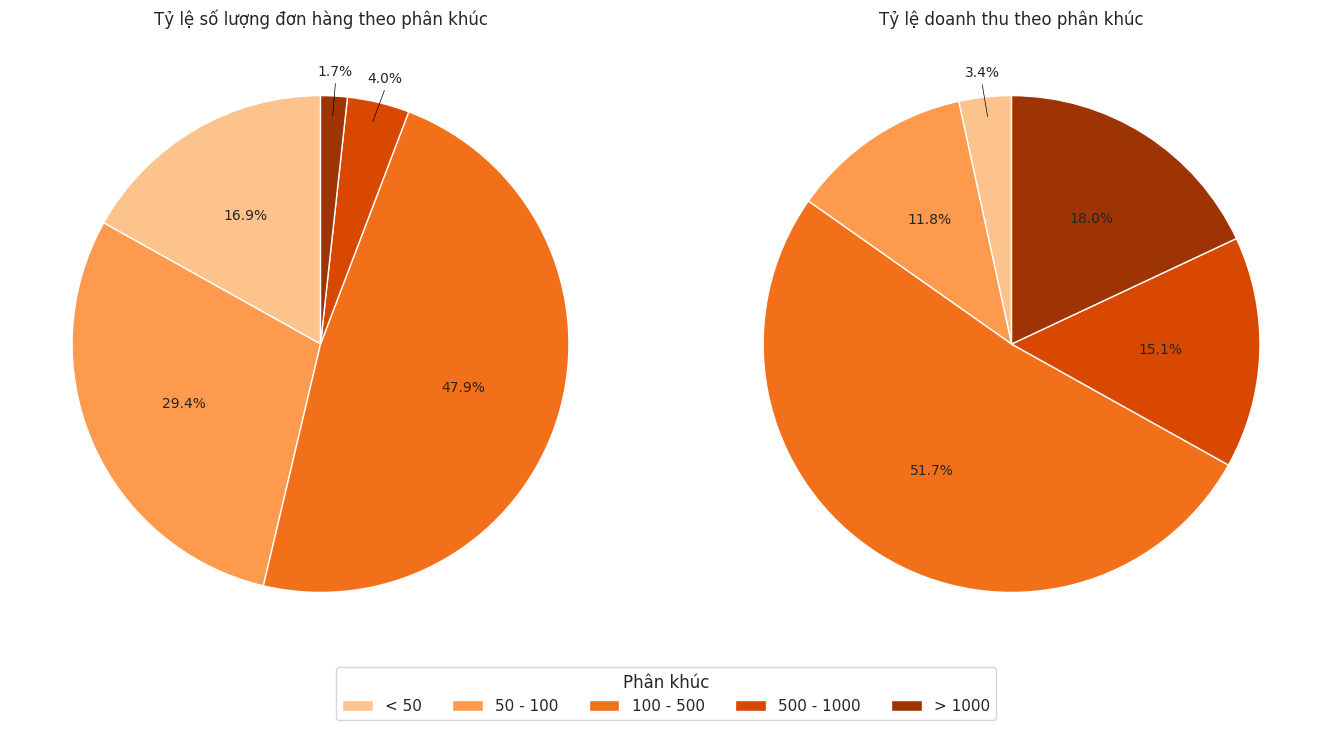

In [228]:
import matplotlib.pyplot as plt
import numpy as np

# Sắp xếp dữ liệu
custom_order = ['< 50', '50 - 100', '100 - 500', '500 - 1000', '> 1000']
revenue_counts = revenue_summary_by_group.reindex(custom_order) # Sắp xếp lại các hàng theo thứ tự như custom_order

display(revenue_counts)

labels = revenue_counts.index
sizes_orders = revenue_counts['orders_by_group']
sizes_revenue = revenue_counts['revenue_by_group']
colors = plt.cm.Oranges(np.linspace(0.3, 0.9, len(labels)))

def plot_custom_pie(ax, sizes, title):
    total = sum(sizes)
    wedges, _ = ax.pie(sizes, colors=colors, startangle=90, radius=1.0)

    for i, wedge in enumerate(wedges):
        percent = sizes.iloc[i] / total * 100
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))

        if percent >= 5:
            # Hiển thị trong miếng
            ax.text(x * 0.6, y * 0.6, f'{percent:.1f}%', ha='center', va='center', fontsize=10)
        else:
            # Đưa ra ngoài mảnh pie
            ax.text(x * 1.1, y * 1.1, f'{percent:.1f}%', ha='center', va='center', fontsize=10)
            ax.plot([x * 0.9, x * 1.1], [y * 0.92, y * 1.05], color='black', lw=0.5)  # đường chỉ dẫn

    ax.set_title(title)

# Vẽ hai biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
plot_custom_pie(axes[0], sizes_orders, 'Tỷ lệ số lượng đơn hàng theo phân khúc')
plot_custom_pie(axes[1], sizes_revenue, 'Tỷ lệ doanh thu theo phân khúc')

# Tạo legend chung ở giữa
fig.legend(labels, title='Phân khúc', loc='center', bbox_to_anchor=(0.5, 0.03), ncol=5)
plt.tight_layout(rect=[0, 0.06, 1, 1])  # Chừa chỗ dưới cho legend
plt.show()


- Phân khúc "R$100 - R$500" chiếm gần một nửa tổng số đơn hàng (47.9%) đóng góp 51.7% tổng doanh thu <br>
    => Đây là phân khúc chủ lực, vừa có số lượng đơn hàng lớn, vừa mang lại doanh thu cao. 
- Phân khúc hàng "> R$500" mặc dù chỉ chiếm một phần rất nhỏ trong tổng số đơn đặt hàng (~5.7%) nhưng lại đóng góp gần một phần tư trong tổng doanh thu (~33.1%) <br>
    => Đây là nhóm tiềm năng, có thể tăng cường marketing và tập trung chăm sóc đặc biệt để giữ chân khách hàng.
-  Phân khúc "R$50 - R$100" có lượng đơn đặt hàng tương đối lớn nhưng doanh thu thu về chỉ chiếm 11.8% trong tổng doanh thu, số lượng đơn đặt hàng lớn nhưng doanh thu không tương xứng. <br>
    => Tìm hiểu các sản phẩm nằm trong phân khúc này để có thể đưa ra các chương trình khuyến mãi phù hợp.
- Phân khúc "< R$50" chiếm 16% tổng số lượng đơn hàng được đặt nhưng chỉ đóng góp một phần rất nhỏ trong tổng doanh thu. <br>
    =>  Những đơn hàng này có giá trị nhỏ, tốn nguồn lực xử lý nhưng mang lại hiệu quả doanh thu thấp.

#### Tần suất mua hàng

In [229]:
# Tính số đơn hàng mỗi khách hàng
orders_with_unique_customer  = delivered_orders.merge(customers, how='inner', on='customer_id') # Gộp bảng customers
orders_per_unique_customer = orders_with_unique_customer.groupby('customer_unique_id').agg(
    orders_count = ('order_id', 'nunique')
).reset_index() # Đếm số lượng đơn của mỗi khách hàng
customer_orders_frequency = orders_per_unique_customer.groupby('orders_count').count().reset_index() # Tần suất mua hàng
customer_orders_frequency.columns = ['purchase_count', 'customer_count']

,purchase_count,customer_count
0,1,90315
1,2,2562
2,3,180
3,4,28
4,5,9
5,6,5
6,7,3
7,9,1
8,15,1


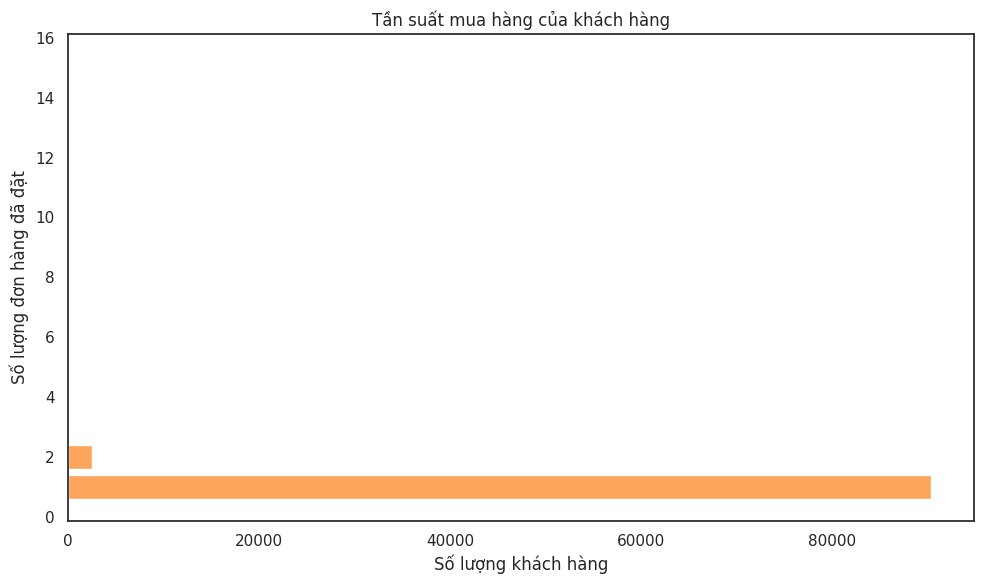

In [230]:
import matplotlib.pyplot as plt

display(customer_orders_frequency) # Phân phối tần suất mua hàng của khách

# Tạo figure
plt.figure(figsize=(10, 6))
plt.barh(
    y=customer_orders_frequency['purchase_count'],
    width=customer_orders_frequency['customer_count'],
    color='#fca55c'
)

# Thêm tiêu đề và nhãn
plt.title('Tần suất mua hàng của khách hàng')
plt.xlabel('Số lượng khách hàng')
plt.ylabel('Số lượng đơn hàng đã đặt')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

- Hơn 90k khách hàng của Olist chỉ thực hiện mua hàng 1 lần duy nhất 
- Chỉ có 2573 khách hàng thực hiện quay lại mua hàng lần thứ 2
- Con số này tiếp tục giảm mạnh đối với những khách hàng mua lần 3 (với 181 người quay lại), 4 lần (28 người), ... <br>
=> Phần lớn khách hàng của Olist là khách hàng mua một lần và tỉ lệ khách hàng quay lại mua hàng là rất thấp 

In [231]:
total_customers = customer_orders_frequency['customer_count'].sum()
loyal_customers = customer_orders_frequency[customer_orders_frequency['purchase_count'] > 1]['customer_count'].sum()
loyal_ratio = loyal_customers / total_customers

print(f"Tỷ lệ khách trung thành: {loyal_ratio:.2%}")

Tỷ lệ khách trung thành: 3.00%


#### Khách hàng mới / quay lại  

In [232]:
# Lấy tháng đầu tiên mỗi khách hàng mua hàng
first_purchase = orders_with_unique_customer.groupby('customer_unique_id')['order_purchase_month'].min().reset_index()
first_purchase.columns = ['customer_unique_id', 'first_purchase_month']
display(first_purchase)

,customer_unique_id,first_purchase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
93099,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
93100,fffea47cd6d3cc0a88bd621562a9d061,2017-12
93101,ffff371b4d645b6ecea244b27531430a,2017-02
93102,ffff5962728ec6157033ef9805bacc48,2018-05


In [233]:
# Gộp vào bảng đơn hàng để biết tháng nào là đơn đầu tiên
orders_with_first = orders_with_unique_customer.merge(first_purchase, on='customer_unique_id', how='left')

# Đánh dấu khách mới nếu tháng mua hàng là tháng đầu tiên
orders_with_first['is_new_customer'] = orders_with_first['order_purchase_month'] == orders_with_first['first_purchase_month']
display(orders_with_first)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_hour,order_purchase_date,...,shipping_limit_date,price,freight_value,revenue,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_purchase_month,is_new_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,2017-10-02,...,2017-10-06 11:07:15,29.99,8.72,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20,2018-07-24,...,2018-07-30 03:24:27,118.70,22.76,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,2018-08-08,...,2018-08-13 08:55:23,159.90,19.22,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,19,2017-11-18,...,2017-11-23 19:45:59,45.00,27.20,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21,2018-02-13,...,2018-02-19 20:31:37,19.90,8.72,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109875,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,12,2018-02-06,...,2018-02-12 13:10:37,174.90,20.10,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,True
109876,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,14,2017-08-27,...,2017-09-05 15:04:16,205.99,65.02,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,True
109877,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,21,2018-01-08,...,2018-01-12 21:36:21,179.99,40.59,220.58,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,True
109878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,21,2018-01-08,...,2018-01-12 21:36:21,179.99,40.59,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,True


In [234]:
# Tính số lượng khách hàng mới và quay lại theo từng tháng
monthly_new_returning = orders_with_first.groupby(['order_purchase_month', 'is_new_customer'])['customer_id']\
                                         .nunique().reset_index()

# Pivot table
monthly_new_returning = monthly_new_returning.pivot(index='order_purchase_month',
                                                    columns='is_new_customer',
                                                    values='customer_id').fillna(0)

# Đổi tên cột 
monthly_new_returning.columns = ['returning', 'new']
monthly_new_returning = monthly_new_returning.astype(int).reset_index()
display(monthly_new_returning)

,order_purchase_month,returning,new
0,2017-01,0,750
1,2017-02,2,1651
2,2017-03,5,2541
3,2017-04,18,2285
4,2017-05,29,3517
5,2017-06,43,3092
6,2017-07,51,3821
7,2017-08,60,4133
8,2017-09,79,4071
9,2017-10,94,4384


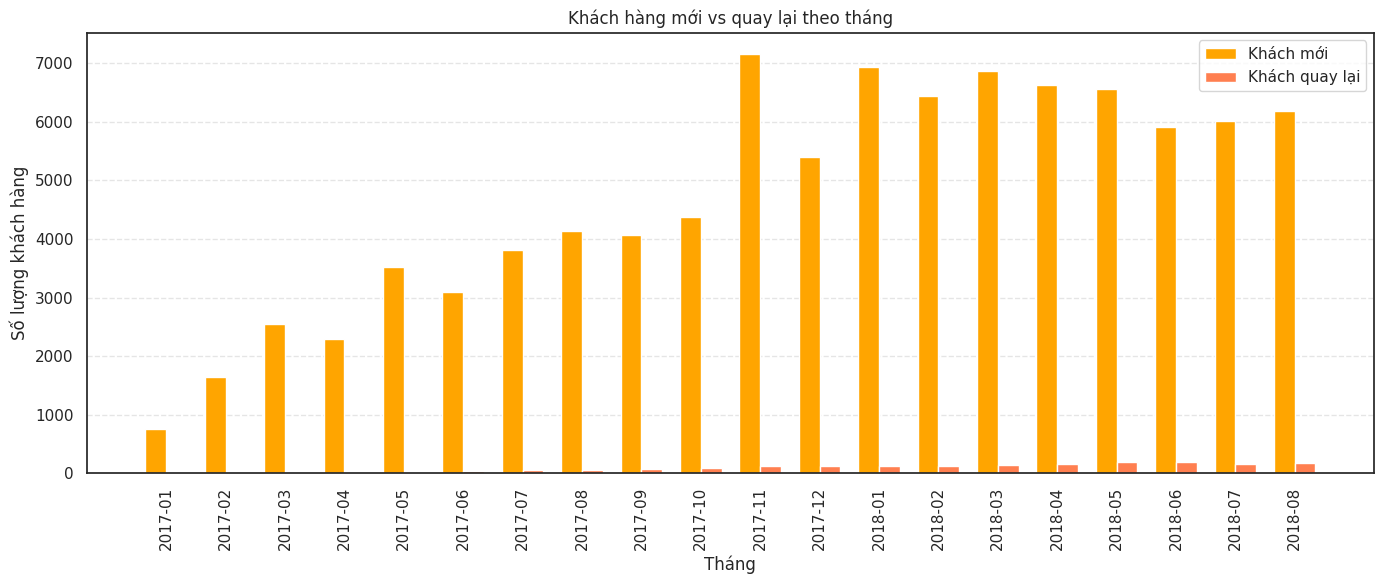

In [235]:
import matplotlib.pyplot as plt
import numpy as np

months = monthly_new_returning['order_purchase_month'].astype(str)
new_customers = monthly_new_returning['new']
returning_customers = monthly_new_returning['returning']

# Vị trí các cột
x = np.arange(len(months))
width = 0.35  # Độ rộng mỗi cột

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, new_customers, width, label='Khách mới', color='orange')
plt.bar(x + width/2, returning_customers, width, label='Khách quay lại', color='coral')

plt.xlabel('Tháng')
plt.ylabel('Số lượng khách hàng')
plt.title('Khách hàng mới vs quay lại theo tháng')
plt.xticks(ticks=x, labels=months, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- Xu hướng khách hàng mới tăng dần theo thời gian, khách hàng quay trở lại cũng tăng, tuy nhiên con số này nhỏ hơn rất nhiều so với số lượng khách hàng mới trong cùng tháng đó.

In [236]:
# Tỉ lệ khách mới chiếm bao nhiêu phần trăm 
monthly_new_returning['total_customer'] = monthly_new_returning['returning'] + monthly_new_returning['new']
monthly_new_returning['new_ratio'] = monthly_new_returning['new'] / monthly_new_returning['total_customer']

# Trung bình chung toàn thời gian
avg_new_ratio = monthly_new_returning['new_ratio'].mean()
print(f"Tỷ lệ khách mới trung bình: {avg_new_ratio:.2%}")

Tỷ lệ khách mới trung bình: 98.34%


In [237]:
max_returning = monthly_new_returning.loc[monthly_new_returning['returning'].idxmax()]
print(f"Tháng {max_returning['order_purchase_month'].strftime("%m/%Y")} có nhiều khách quay lại nhất với {max_returning['returning']:.0f} khách")


Tháng 05/2018 có nhiều khách quay lại nhất với 191 khách


In [238]:
# AOV của khách mới và khách quay lại khác nhau không?
from scipy.stats import ttest_ind

# Tính AOV của mỗi nhóm
aov_type = orders_with_first.groupby('is_new_customer')['revenue'].mean().reset_index()
aov_type.rename(columns={'is_new_customer':'new_customer','revenue': 'AOV'}, inplace=True)

# Kiểm định sự khác biệt AOV giữa khách mới và quay lại
new_orders = orders_with_first[orders_with_first['is_new_customer'] == True]['revenue']
returning_orders = orders_with_first[orders_with_first['is_new_customer'] == False]['revenue']

stat, p_value = ttest_ind(new_orders, returning_orders, equal_var=False)

# Hiển thị kết quả
display(aov_type)
print(f"\nKết quả kiểm định t-test:")
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ Khách mới và khách quay lại có hành vi chi tiêu khác nhau.")
else:
    print("→ Không có sự chênh lệch rõ ràng về AOV giữa hai nhóm khách hàng.")

,new_customer,AOV
0,False,145.120013
1,True,159.813138



Kết quả kiểm định t-test:
Statistic: 4.6682, p-value: 0.0000
→ Khách mới và khách quay lại có hành vi chi tiêu khác nhau.


- Khách hàng có xu hướng mua một lần rồi rời đi. Dù số lượng đơn hàng lớn và AOV ổn định, nhưng lại phụ thuộc quá nhiều vào khách hàng mới và thiếu lực để giữ chân khách hàng cũ.

### 3.3. Sản phẩm & Danh mục

**Mục tiêu**: Hiểu rõ sở thích và hành vi mua sắm của khách hàng 

#### Sản phẩm/Danh mục được ưa chuộng

In [239]:
delivered_orders_with_category = delivered_orders.merge(products, how='left', on='product_id')
delivered_orders_with_category = delivered_orders_with_category.merge(product_category_name_translation, how='left', on='product_category_name')
delivered_orders_with_category['product_category_name_english'] = delivered_orders_with_category['product_category_name_english'].fillna('Unknown')
orders_stats_by_category  = delivered_orders_with_category.groupby('product_category_name_english').agg(
    orders_count = ('order_id', 'nunique'),
    revenue = ('revenue', 'sum')
).reset_index()
orders_stats_by_category['aov'] = orders_stats_by_category['revenue'] / orders_stats_by_category['orders_count']
display(orders_stats_by_category)

,product_category_name_english,orders_count,revenue,aov
0,Unknown,1410,225077.89,159.629709
1,agro_industry_and_commerce,177,96095.58,542.912881
2,air_conditioning,242,71685.08,296.219339
3,art,195,28240.82,144.824718
4,arts_and_craftmanship,23,2266.57,98.546522
...,...,...,...,...
67,stationery,2264,288326.14,127.352535
68,tablets_printing_image,79,9375.59,118.678354
69,telephony,4086,423175.03,103.567066
70,toys,3782,570735.18,150.908297


In [240]:
top_category_orders = orders_stats_by_category[orders_stats_by_category['orders_count'] == max(orders_stats_by_category['orders_count'])]
top_revenue_orders = orders_stats_by_category[orders_stats_by_category['revenue'] == max(orders_stats_by_category['revenue'])]
top_aov_orders = orders_stats_by_category[orders_stats_by_category['aov'] == max(orders_stats_by_category['aov'])]

print(f'Danh mục sản phẩm có số lượng đơn hàng cao nhất là: {top_category_orders['product_category_name_english'].values[0]} với {top_category_orders['orders_count'].values[0]:,} đơn đặt hàng')
print(f'Danh mục sản phẩm có tổng doanh thu cao nhất là: {top_revenue_orders['product_category_name_english'].values[0]} với R${top_revenue_orders['revenue'].values[0]:,}')
print(f'Danh mục sản phẩm có AOV cao nhất là: {top_aov_orders['product_category_name_english'].values[0]} với R${top_aov_orders['aov'].values[0]:,.2f}')

Danh mục sản phẩm có số lượng đơn hàng cao nhất là: bed_bath_table với 9,267 đơn đặt hàng
Danh mục sản phẩm có tổng doanh thu cao nhất là: health_beauty với R$1,512,590.96
Danh mục sản phẩm có AOV cao nhất là: computers với R$1,436.45


In [241]:
# Mối quan hệ giữa danh mục sản phẩm phổ biến với danh mục sản phẩm có doanh thu cao 
top_10 = orders_stats_by_category.sort_values(by='revenue', ascending=False).head(10)
display(top_10)


,product_category_name_english,orders_count,revenue,aov
44,health_beauty,8610,1512590.96,175.678393
8,bed_bath_table,9267,1457726.46,157.302952
71,watches_gifts,5491,1324596.75,241.230514
16,computers_accessories,6518,1286344.70,197.352670
66,sports_leisure,7513,1230355.06,163.763485
40,furniture_decor,6258,1123671.69,179.557637
50,housewares,5734,909125.42,158.549951
6,auto,3802,749602.97,197.160171
21,cool_stuff,3552,716485.12,201.713153
43,garden_tools,3443,684460.52,198.797711


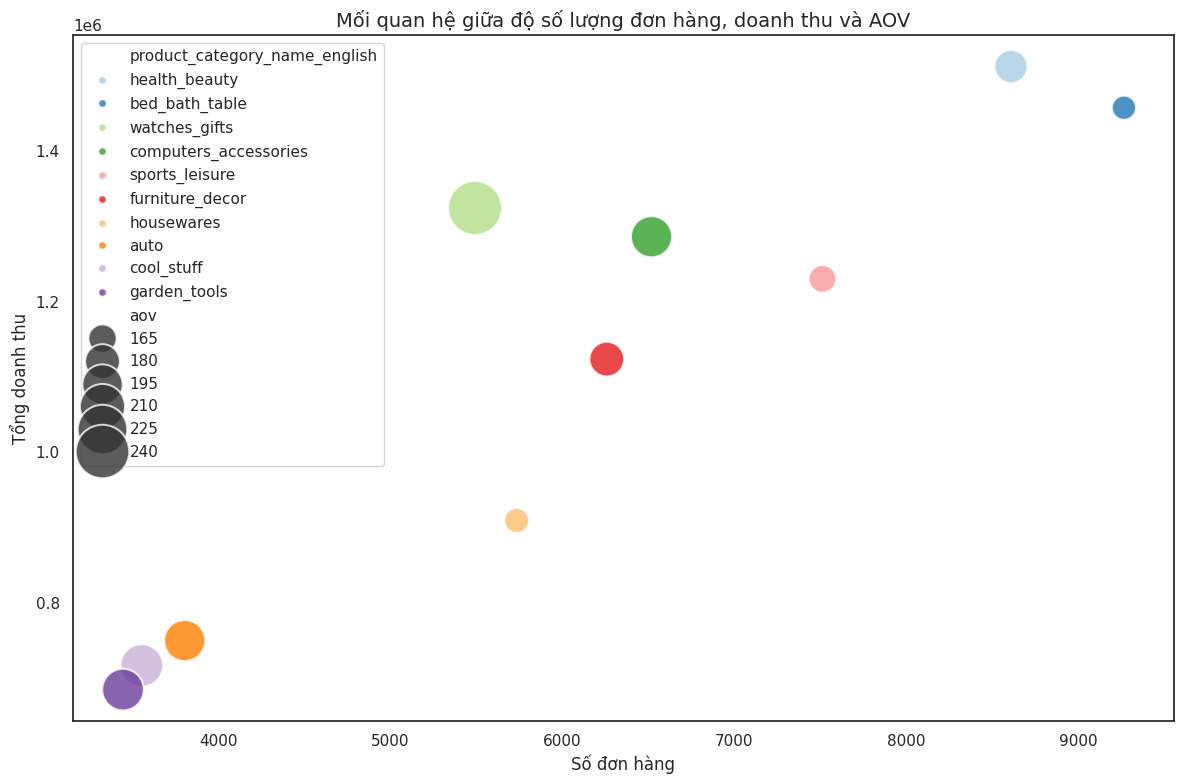

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_style("white")

bubble = sns.scatterplot(
    data=top_10,
    x='orders_count',
    y='revenue',
    size='aov',
    hue='product_category_name_english',
    palette='Paired',
    sizes=(300, 1500),
    alpha=0.8
)

plt.title('Mối quan hệ giữa độ số lượng đơn hàng, doanh thu và AOV', fontsize=14)
plt.xlabel('Số đơn hàng')
plt.ylabel('Tổng doanh thu')

plt.tight_layout()
plt.show()


- 'Bed bath table' có số lượng đơn hàng cao nhất vớ 9267 đơn hàng nhưng chỉ đứng thứ 2 về mặt doanh thu. Trong khi đó, 'health beaty' có ít đơn hàng hơn nhưng lại tạo ra doanh thu cao nhất. 'Watches_gift' chỉ có 5491 đơn hàng (thấp hơn nhiều so với 'bed bath table', 'health beaty' hay 'sports_leisure', 'computers_accessories') nhưng lại xếp thứ 3 về doanh thu.

    => Danh mục sản phẩm phổ biến nhưng AOV thấp, tổng doanh thu tạo ra có thể không phải là cao nhất. Ngược lại, daonh mục ít phổ biến hơn nhưng bán sản phẩm giá trị cao có thể tạo ra doanh thu rất lớn.

- Các danh mục sản phẩm phổ biến như 'bed bath table', 'health beaty', 'sports_leisure' có AOV ở mức trung bình, thấp hơn hầu hết các danh mục sản phẩm khác trong top 10. Ngược lại, các danh mục có AOV cao như 'watches_gift', 'cool_stuff' ,'computers_accessories', 'auto, ... lại có số lượng đơn hàng thấp hơn đáng kể.

    => Các mặt hàng thiết yếu hoặc phổ thông thường (đồ dùng nhà tắm, sức khỏe & sắc đẹp, đồ thể thao) được mua thường xuyên nhưng giá trị mỗi lần mua không quá lớn (AOV thấp/trung bình). Trong khi đó, các mặt hàng đặt tiền hơn như đồng hồ, quà tặng, đồ tự động, ... được mua ít thường xuyển hơn nhưng mỗi đơn hàng lại có giá trị rất cao (AOV cao).

- Một danh mục sản phẩm có thể đạt doanh thu cao bằng cách:
    - Bán nhiều đơn hàng với AOV vừa phải: 'health_beauty', 'bed_bath_table'.
    - Bán số lượng đơn hàng vừa phải nhưng AOV cao: 'watches_gift'
    - Cân bằng giữa số lượng đơn hàng và AOV: 'computers_accessories'

####  Lượng sản phẩm mỗi đơn

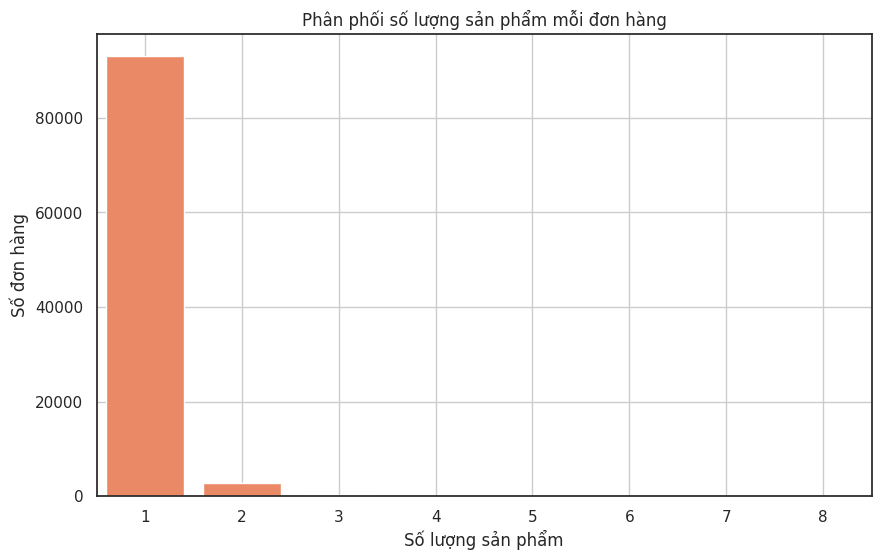

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt 

product_stats_by_orders = delivered_orders_with_category.groupby('order_id').agg(
    product_count = ('product_id', 'nunique')
).reset_index()

# Vẽ biểu đồ phân phối số lượng sản phẩm mỗi đơn hàng
plt.figure(figsize=(10, 6))
sns.countplot(data=product_stats_by_orders, x='product_count', color='coral')
plt.title('Phân phối số lượng sản phẩm mỗi đơn hàng')
plt.xlabel('Số lượng sản phẩm')
plt.ylabel('Số đơn hàng')
plt.grid(True)
plt.show()


In [244]:
# Biểu đồ số lượng danh mục sản phẩm mỗi đơn hàng
product_dist = product_stats_by_orders.groupby('product_count').count().reset_index()
product_dist.columns = ['product_per_order', 'orders_count']
display(product_dist)

,product_per_order,orders_count
0,1,93023
1,2,2801
2,3,298
3,4,68
4,5,7
5,6,10
6,7,3
7,8,1


In [245]:
product_per_orders_avg = product_stats_by_orders['product_count'].mean()
print(f'Số lượng sản phẩm trung bình trong 1 đơn hàng là: {product_per_orders_avg:.2f}')
print(f'Số lượng sản phẩm tối đa có trong một đơn hàng là: {max(product_dist['product_per_order'])} sản phẩm')

Số lượng sản phẩm trung bình trong 1 đơn hàng là: 1.04
Số lượng sản phẩm tối đa có trong một đơn hàng là: 8 sản phẩm


In [246]:
# Lọc ra các đơn hàng có nhiều hơn 2 sản phẩm 
orders_with_multiple_products = product_stats_by_orders[product_stats_by_orders['product_count'] >= 2] # Lọc ra các đơn hàng trên 2 sản phẩm
orders_product = orders_with_multiple_products.merge(delivered_orders_with_category, how='left', on='order_id') # Chi tiết các đơn hàng có >= 2 sản phẩm

# Liệt kê các mặt hàng sản phẩm có trong mỗi đơn hàng
orders_product_summary = orders_product.groupby('order_id').agg(
    product_id=('product_id', lambda x: ', '.join(set(x))),
    category_type=('product_category_name_english', lambda x: ', '.join(set(x))),
    combo=('product_id', lambda x: len(set(x))) # số lượng sản phẩm của 1 đơn hàng
).reset_index()

In [247]:
import pandas as pd
from itertools import combinations

# Tách các combo có trên 2 sản phẩm thành các combo 2
product_pairs_list = []  # Danh sách lưu các cặp category sau khi xử lý

for idx, row in orders_product_summary.iterrows():
    order_id = row['order_id']
    product_list = row['product_id']
    product = [cat.strip() for cat in row['product_id'].split(',')]
    product_quantities = row['combo'] # Số sản phẩm trong đơn hàng
    
    if product_quantities == 2:
        sorted_pair = sorted(product) # Sắp xếp theo thứ tự bảng chữ cái
        new_product_type = f"{sorted_pair[0]}, {sorted_pair[1]}"
        product_pairs_list.append({'order_id': order_id, 'product_list': product_list, 'products': new_product_type, 'combo': product_quantities})
        
    elif product_quantities >= 3:
        # Tạo tổ hợp 2 products
        for combo in combinations(product, 2):
            sorted_combo = sorted(combo)
            new_category_type = f"{sorted_combo[0]}, {sorted_combo[1]}"
            product_pairs_list.append({'order_id': order_id, 'product_list': product_list, 'products': new_product_type, 'combo': product_quantities})

product_combo = pd.DataFrame(product_pairs_list)

# Số lượng đơn hàng mua các combo đã liệt kê
combo_summary = product_combo.groupby(['products']).agg(
    combo_purchase_count = ('products', 'count')
).reset_index()
display(combo_summary.sort_values(by=['combo_purchase_count'], ascending=False))

,products,combo_purchase_count
981,"36f60d45225e60c7da4558b070ce4b60, e53e557d5a15...",53
947,"35afc973633aaeb6b877ff57b2793310, 99a4788cb248...",44
823,"2dfbe6c95d43a6a29a0d56e5b9f528f2, 4fbee589d337...",29
1765,"7185389e32acf9c5c5f61e6a23c0ab3a, ec2d43cc5976...",24
1558,"5f42d57952b7815098979a5c4fa6f82a, 6463e442310f...",23
...,...,...
2523,"f03db1ea02e265f0f1a5ae2a5e0984a7, f09f6223e88a...",1
8,"00ae7076313576f94d9107599d79a978, 2873da054c3a...",1
12,"0105b5323d24fc655f73052694dbbb3a, 5ed9eaf534f6...",1
13,"010a3a47c14f1295796c08419f32cef6, 3a98bcea866c...",1


In [248]:
combo_best_seller = combo_summary[combo_summary['combo_purchase_count'] == max(combo_summary['combo_purchase_count'])]
combo_best_seller_product = combo_best_seller['products'].str.cat(sep= ', ') # Chuyển Series thành chuỗi

# Lấy danh mục của các sản phẩm
first_product_in_combo_best_seller_category = product_category_name_translation[product_category_name_translation['product_category_name'] 
                                                                             == products[products['product_id'] == combo_best_seller_product.split(',')[0]]
                                                                             ['product_category_name'].str.cat()]['product_category_name_english'].str.cat()
second_product_in_combo_best_seller_category = product_category_name_translation[product_category_name_translation['product_category_name'] 
                                                                             == products[products['product_id'] == combo_best_seller_product.split(', ')[1]]
                                                                             ['product_category_name'].str.cat()]['product_category_name_english'].str.cat()

print(f'Combo sản phẩm được khách hàng mua nhiều nhất: {combo_best_seller_product} thuộc danh mục {set([first_product_in_combo_best_seller_category, second_product_in_combo_best_seller_category]).pop()}')

Combo sản phẩm được khách hàng mua nhiều nhất: 36f60d45225e60c7da4558b070ce4b60, e53e557d5a159f5aa2c5e995dfdf244b thuộc danh mục computers_accessories


#### Thói quen mua hàng

In [249]:
# Tỷ lệ đơn hàng chứa nhiều danh mục (chỉ tính đơn có đầy đủ danh mục sản phẩm)?
# Liệt kê các danh mục sản phẩm có trong giỏ hàng của khách hàng
orders_category_summary = delivered_orders_with_category.dropna(subset=['product_category_name']).copy().groupby('order_id').agg(
    category_type=('product_category_name_english', lambda x: ', '.join(set(x))),
    unique_categories_count=('product_category_name_english', lambda x: len(set(x)))
).reset_index()

# Thống kê số lượng đơn hàng theo số lượng danh mục mục sản phẩm có trong giỏ hàng
category_combo_summary = orders_category_summary.groupby(['unique_categories_count']).agg(
    combo_purchase_count = ('category_type', 'count')
).reset_index()

In [250]:
category_combo_summary['percentage'] = round((category_combo_summary['combo_purchase_count'] / sum(category_combo_summary['combo_purchase_count'])), 5)
display(category_combo_summary)

,unique_categories_count,combo_purchase_count,percentage
0,1,94160,0.99240
1,2,706,0.00744
2,3,15,0.00016


- Đa số khách hàng thường có xu hướng mua sắm tập trung, tức là họ chỉ mua một danh mục sản phẩm duy nhất.
- Chỉ một tỷ lệ rất nhỏ (dưới 1%) khách hàng mua hàng từ 2 hoặc 3 danh mục khác nhau.

### 3.4. Phân tích nguyên nhân

**Mục tiêu**: Tìm kiếm các dấu hiệu hoặc nguyên nhân dẫn ảnh hưởng đến trải nghiệm của khách hàng

#### Ảnh hưởng của thời gian giao hàng

In [251]:
# Thời gian giao hàng có liên quan đến đánh giá (review score) không?
delivered_orders['delivered_time'] = delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']
delivered_orders_time = delivered_orders[['order_id', 'customer_id', 'delivered_time']].copy()
delivered_orders_time = delivered_orders_time.drop_duplicates(subset=['order_id', 'customer_id', 'delivered_time'], keep='first')

def categorize_delivered_time(row):
    if row < pd.Timedelta(days=7):
        return '< 7 days'
    elif row >= pd.Timedelta(days=7) and row < pd.Timedelta(days=15):
        return '7-15 days'
    elif row >= pd.Timedelta(days=15) and row < pd.Timedelta(days=30):
        return '15-30 days'
    else: return '> 30 days'


delivered_orders_time['delivered_time_group'] = delivered_orders_time['delivered_time'].apply(categorize_delivered_time)
display(delivered_orders_time)

,order_id,customer_id,delivered_time,delivered_time_group
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8 days 10:28:40,7-15 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13 days 18:46:08,7-15 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9 days 09:27:40,7-15 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13 days 05:00:36,7-15 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2 days 20:58:23,< 7 days
...,...,...,...,...
110191,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,8 days 05:13:56,7-15 days
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22 days 04:38:58,15-30 days
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,24 days 20:37:34,15-30 days
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17 days 02:04:27,15-30 days


delivered_time_group
< 7 days      26037
7-15 days     43941
15-30 days    21723
> 30 days      4510
Name: count, dtype: int64

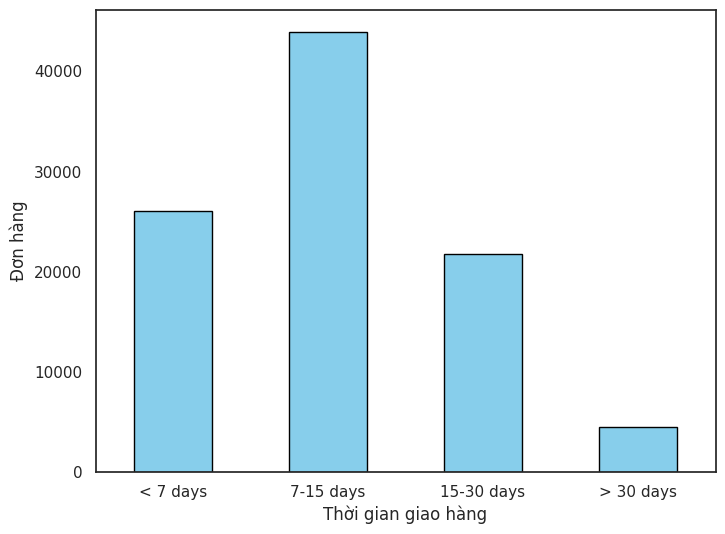

In [252]:
# Tính tần suất của các nhóm trong cột 'delivered_time_group'
time_group_counts = delivered_orders_time['delivered_time_group'].value_counts()
ordered_categories = ['< 7 days', '7-15 days', '15-30 days', '> 30 days']
time_group_counts = time_group_counts[ordered_categories]

display(time_group_counts)

# Vẽ biểu đồ tần suất
plt.figure(figsize=(8, 6))
time_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Thời gian giao hàng')
plt.ylabel('Đơn hàng')
plt.xticks(rotation=0)
plt.show()

In [253]:
avg_delivered_time = delivered_orders_time['delivered_time'].mean()
print(f'Thời gian giao hàng trung bình: {avg_delivered_time.days} ngày')

Thời gian giao hàng trung bình: 12 ngày


In [254]:
# Tính điểm review trung bình của mỗi nhóm thời gian giao hàng
delivered_orders_time_with_review = delivered_orders_time.merge(orders_reviews[['order_id', 'review_score']], how='left', on='order_id')
delivered_orders_time_with_review.groupby('delivered_time_group').agg(
    avg_scores = ('review_score', 'mean')
).reset_index()

,delivered_time_group,avg_scores
0,15-30 days,3.932673
1,7-15 days,4.303651
2,< 7 days,4.417694
3,> 30 days,2.245642


- Thời gian giao hàng trung bình là 12 ngày. Phần lớn các đơn hàng được giao trong vòng từ 7 đến 15 ngày với hơn 43 nghìn đơn.
- Có khoảng hơn 4500 đơn hàng mất hơn 30 ngày mới giao được đến tay khách hàng.
- Những đơn hàng được giao dưới 15 ngày có điểm đánh giá khá cao, điểm trung bình trên 4.3. 
- Đơn hàng giao từ 15-30 ngày có điểm đánh giá 3.9, thấp hơn một chút so với các đơn hàng dưới 15 ngày.
- Hiển nhiên, các đơn hàng có thời gian giao hàng lâu (trên 30 ngày) có điểm đánh giá khá thấp với điểm đánh giá trung bình chỉ đạt 2.24.

=> Thời gian giao hàng càng nhanh, khách hàng càng hài lòng. Ngược lại, giao hàng lâu (trên 30 ngày) làm khách bực mình và đánh giá thấp.

#### Ảnh hưởng của vị trí địa lý

In [255]:
orders_with_geolocation = delivered_orders_time.merge(customers, how='left', on='customer_id')
orders_with_geolocation = orders_with_geolocation.merge(orders_reviews, how='left', on='order_id')
orders_by_state_summary = orders_with_geolocation.groupby(['customer_state']).agg(
    orders_count = ('order_id', 'nunique'),
    avg_delivered_time = ('delivered_time', 'median'),
    avg_review_score = ('review_score', 'mean')
).reset_index()

display(orders_by_state_summary)

,customer_state,orders_count,avg_delivered_time,avg_review_score
0,AC,80,18 days 08:33:24,4.087500
1,AL,396,22 days 07:21:24.500000,3.841310
2,AM,145,25 days 20:41:43.500000,4.220690
3,AP,67,24 days 08:19:43,4.242424
4,BA,3253,16 days 22:34:06,3.929078
5,CE,1273,18 days 04:05:04,3.933858
6,DF,2074,11 days 11:08:16,4.134422
7,ES,1992,13 days 16:01:31,4.082532
8,GO,1950,13 days 22:47:26,4.100716
9,MA,713,19 days 03:14:28,3.835905


In [256]:
# Bang nào có nhiều đơn hàng nhất?
highest_orders_state = orders_by_state_summary[orders_by_state_summary['orders_count'] == max(orders_by_state_summary['orders_count'])]['customer_state'].str.cat()
city_orders_quantity = orders_by_state_summary[orders_by_state_summary['customer_state'] == highest_orders_state]['orders_count'].values[0]
print(f'Bang \'{highest_orders_state}\' có nhiều đơn hàng nhất với {city_orders_quantity} đơn hàng')

# Bang nào có thời gian giao hàng trung bình ngắn nhất/dài nhất?
shortest_delivery_time_city = orders_by_state_summary[orders_by_state_summary['avg_delivered_time'] == min(orders_by_state_summary['avg_delivered_time'])]['customer_state'].str.cat()
shortest_delivery_time = orders_by_state_summary[orders_by_state_summary['customer_state'] == shortest_delivery_time_city]['avg_delivered_time'].dt.components
longest_delivery_time_city =  orders_by_state_summary[orders_by_state_summary['avg_delivered_time'] == max(orders_by_state_summary['avg_delivered_time'])]['customer_state'].str.cat()
longest_delivery_time = orders_by_state_summary[orders_by_state_summary['customer_state'] == longest_delivery_time_city]['avg_delivered_time'].dt.components

print(f'Bang \'{shortest_delivery_time_city}\' có thời gian giao hàng ngắn nhất với thời gian giao hàng trung bình là {shortest_delivery_time['days'].iloc[0]} ngày {shortest_delivery_time['hours'].iloc[0]}:{shortest_delivery_time['minutes'].iloc[0]}:{shortest_delivery_time['seconds'].iloc[0]}')
print(f'Bang \'{longest_delivery_time_city}\' có thời gian giao hàng dài nhất với thời gian giao hàng trung bình là {longest_delivery_time['days'].iloc[0]} ngày {longest_delivery_time['hours'].iloc[0]}:{longest_delivery_time['minutes'].iloc[0]}:{longest_delivery_time['seconds'].iloc[0]} giờ')

# Khách hàng ở bang nào cho điểm đánh giá cao nhất/thấp nhất?
highest_score_state = orders_by_state_summary[orders_by_state_summary['avg_review_score'] == max(orders_by_state_summary['avg_review_score'])]['customer_state'].str.cat()
highest_score = orders_by_state_summary[orders_by_state_summary['customer_state'] == highest_score_state]['avg_review_score'].values[0]
lowest_score_state = orders_by_state_summary[orders_by_state_summary['avg_review_score'] == min(orders_by_state_summary['avg_review_score'])]['customer_state'].str.cat()
lowest_score = orders_by_state_summary[orders_by_state_summary['customer_state'] == lowest_score_state]['avg_review_score'].values[0]
print(f'Khách hàng ở bang \'{highest_score_state}\' với điểm đánh giá trung bình {highest_score:.2f} là bang có điểm đánh giá cao nhất')
print(f'Khách hàng ở bang \'{lowest_score_state}\' có điểm đánh giá trung bình thấp nhất, đạt {lowest_score:.2f} điểm')

Bang 'SP' có nhiều đơn hàng nhất với 40406 đơn hàng
Bang 'SP' có thời gian giao hàng ngắn nhất với thời gian giao hàng trung bình là 7 ngày 4:58:30
Bang 'AM' có thời gian giao hàng dài nhất với thời gian giao hàng trung bình là 25 ngày 20:41:43 giờ
Khách hàng ở bang 'SP' với điểm đánh giá trung bình 4.25 là bang có điểm đánh giá cao nhất
Khách hàng ở bang 'MA' có điểm đánh giá trung bình thấp nhất, đạt 3.84 điểm


In [257]:
# Khoảng cách địa lý có làm ảnh hưởng đến thời gian giao hàng hay không ?
# Nối bảng customer với bảng geolocation, bảng delivered_orders_time
customers_location = customers.merge(geolocation, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
customers_location = customers_location.merge(delivered_orders_time, how='inner', on='customer_id')
customers_location = customers_location[['order_id', 'customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng', 'delivered_time']]
customers_location = customers_location.rename(columns={
    'geolocation_lat': 'customer_geolocation_lat',
    'geolocation_lng': 'customer_geolocation_lng',
})
display(customers_location)

,order_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,delivered_time
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.499273,-47.396658,8 days 19:30:00
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,-23.728396,-46.542250,16 days 15:52:55
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,-23.531309,-46.656690,26 days 01:51:06
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,-23.500670,-46.186348,14 days 23:57:47
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,-22.975708,-47.143140,11 days 11:04:18
...,...,...,...,...,...,...,...,...
95942,6760e20addcf0121e9d58f2f1ff14298,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP,-23.586179,-46.499652,6 days 04:18:20
95943,9ec0c8947d973db4f4e8dcf1fbfa8f1b,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP,-23.616789,-46.767716,7 days 10:34:23
95944,fed4434add09a6f332ea398efd656a5c,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE,-3.735628,-38.510775,30 days 22:51:25
95945,e31ec91cea1ecf97797787471f98a8c2,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS,-29.949964,-51.168380,12 days 22:50:06


In [258]:
# Nối bảng seller với bảng geolocation, bảng order_items
seller_location = sellers.merge(geolocation, how='inner', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
order_seller = orders_items.drop_duplicates(subset=['order_id', 'seller_id'], keep='first') # Loại bỏ các giá trị trùng của cặp giá trị ('order_id', 'seller_id')
seller_location = seller_location.merge(order_seller, how='inner', on='seller_id')
seller_location = seller_location[['order_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'geolocation_lat', 'geolocation_lng']]
seller_location = seller_location.rename(columns={
    'geolocation_lat': 'seller_geolocation_lat',
    'geolocation_lng': 'seller_geolocation_lng',
})
display(seller_location)

,order_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,4a90af3e85dd563884e2afeab1091394,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893317,-47.060596
1,6d953888a914b67350d5bc4d48f2acab,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893317,-47.060596
2,bc8a5de6abf5b14f98a6135a7fb46731,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893317,-47.060596
3,035201c3c82a97f8a25dd6bd5244b2d5,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383375,-46.948142
4,0504447548229e075dea8441b37b1e2a,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383375,-46.948142
...,...,...,...,...,...,...,...
99785,7aa50aad959e4345b45b9732bc346a6e,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.750845,-52.322765
99786,aae373a2cc64ed2d1f262aa56e70b7e8,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.750845,-52.322765
99787,bc34d5b185152cb88b9f5db391dcd1cb,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.750845,-52.322765
99788,d1edb80f6670902ebbb11765b96873da,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.750845,-52.322765


In [259]:
# Nối bảng customer với bảng seller
seller_to_customer = customers_location.merge(seller_location, how='inner', on='order_id')
seller_to_customer['delivered_time'] = seller_to_customer['delivered_time'].dt.days
display(seller_to_customer)

,order_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,delivered_time,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.499273,-47.396658,8.0,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,-23.486138,-46.367107
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,-23.728396,-46.542250,16.0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,-26.912506,-48.674090
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,-23.531309,-46.656690,26.0,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,-23.486138,-46.367107
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,-23.500670,-46.186348,14.0,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,-23.486138,-46.367107
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,-22.975708,-47.143140,11.0,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,-21.757225,-48.829541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97058,6760e20addcf0121e9d58f2f1ff14298,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP,-23.586179,-46.499652,6.0,527801b552d0077ffd170872eb49683b,17400,garca,SP,-22.211504,-49.658895
97059,9ec0c8947d973db4f4e8dcf1fbfa8f1b,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP,-23.616789,-46.767716,7.0,3fd1e727ba94cfe122d165e176ce7967,14802,araraquara,SP,-21.772215,-48.180724
97060,fed4434add09a6f332ea398efd656a5c,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE,-3.735628,-38.510775,30.0,d9e7e7778b32987280a6f2cb9a39c57d,3304,sao paulo,SP,-23.545570,-46.577968
97061,e31ec91cea1ecf97797787471f98a8c2,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS,-29.949964,-51.168380,12.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,-21.363473,-48.229588


**Haversine formula**

\begin{align}
    a &= \sin^2\left(\frac{\Delta \text{lat}}{2}\right) + \cos(\text{lat}_1) \cdot \cos(\text{lat}_2) \cdot \sin^2\left(\frac{\Delta \text{lon}}{2}\right) \\
    c &= 2 \cdot atan2\left(\sqrt{a}, \sqrt{1 - a}\right) \\
    d &= R \cdot c
\end{align}

In [260]:
import math 

def haversine(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(math.radians, [lat1, lng1, lat2, lng2])

    dlat = lat2 - lat1
    dlng = lng2 - lng1
    a = pow(math.sin(dlat/2), 2) + math.cos(lat1) * math.cos(lat2) * pow(math.sin(dlng/2), 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    R = 6371
    d = R * c
    return d

# Tính khoảng cách địa lý giữa người khách hàng và người bán
seller_to_customer['distance'] = seller_to_customer.apply(
    lambda row: haversine(
        row['customer_geolocation_lat'], 
        row['customer_geolocation_lng'],
        row['seller_geolocation_lat'], 
        row['seller_geolocation_lng']
        ),
    axis = 1
)

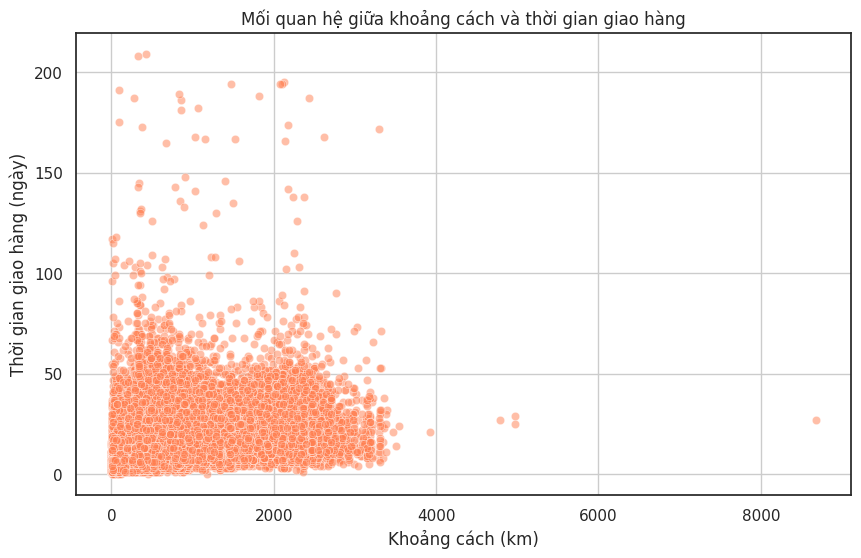

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=seller_to_customer, x='distance', y='delivered_time', alpha=0.5, color='coral')
plt.xlabel('Khoảng cách (km)')
plt.ylabel('Thời gian giao hàng (ngày)')
plt.title('Mối quan hệ giữa khoảng cách và thời gian giao hàng')
plt.grid(True)
plt.show()


In [262]:
correlation = seller_to_customer[['distance', 'delivered_time']].corr()
print("Hệ số tương quan:")
print(correlation)

Hệ số tương quan:
                distance  delivered_time
distance        1.000000        0.394723
delivered_time  0.394723        1.000000


- Phần lớn các đơn hàng có khoảng cách vận chuyển dưới 3000km.
- Với cùng một khoảng cách, thời gian giao hàng có thể giao động rất lớn (có đơn hàng mất tới hơn 200 ngày)
- Hệ số tương quan bằng 0.39 cho thấy khoảng cách vận chuyển có ảnh hưởng đến thời gian giao hàng nhưng tác động không quá mạnh. Một số đơn hàng ở gần nhưng vẫn mất nhiều thời gian giao, cho thấy có thể tồn tại các yếu tố vận hành khác làm ảnh hưởng đến hiệu quả giao hàng.

In [263]:
def categorize_distance(distance):
    if distance < 300:
        return 'Dưới 300 km'
    elif distance <= 700:
        return '300–700 km'
    elif distance <= 1500:
        return '700–1500 km'
    else:
        return 'Trên 1500 km'
    
# Xác định thứ tự
ordered_groups = ['Dưới 300 km', '300–700 km', '700–1500 km', 'Trên 1500 km']

seller_to_customer['distance_group'] = seller_to_customer['distance'].apply(categorize_distance) # Phân loại nhóm khoảng cách

# Ép kiểu distance_group thành kiểu category có thứ tự
seller_to_customer['distance_group'] = pd.Categorical(
    seller_to_customer['distance_group'],
    categories=ordered_groups,
    ordered=True
)

# Thời gian giao hàng trung bình theo từng nhóm
group_avg_shipping = seller_to_customer.groupby('distance_group', observed=False)['delivered_time'].mean().reset_index()
print(group_avg_shipping)

  distance_group  delivered_time
0    Dưới 300 km        7.485272
1     300–700 km       12.366103
2    700–1500 km       14.998601
3   Trên 1500 km       20.025949


=> Thời gian giao hàng trung bình có xu hướng tăng đều theo khoảng cách vận chuyển. 

#### Nhóm các sản phẩm bị đánh giá thấp

In [264]:
# Tạo bảng product với điểm review
product_review = orders_items.merge(products, how='inner', on='product_id')
product_review = product_review.drop_duplicates(subset=['order_id', 'product_id'], keep='first')
product_review = product_review.merge(product_category_name_translation, how = 'left', on='product_category_name')
product_review = product_review.merge(orders_reviews, how='inner', on='order_id')
product_review = product_review[['order_id', 'product_id', 'product_category_name_english', 'review_score']]
display(product_review)

,order_id,product_id,product_category_name_english,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,5
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,5
...,...,...,...,...
102225,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,housewares,5
102226,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,computers_accessories,5
102227,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,sports_leisure,5
102228,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,computers_accessories,5


In [265]:
# Tính điểm đánh giá trung bình theo danh mục
category_review = product_review.groupby(by=['product_category_name_english']).agg(
    average_review_score=('review_score', 'mean'),
    review_count=('review_score', 'count')
).reset_index()

# Lọc ra các danh mục sản phẩm có điểm đánh giá thấp hơn 3
categories_with_low_reviews = category_review[category_review['average_review_score'] <= 3] 
print("Danh mục sản phẩm có điểm đánh giá trung bình thấp: ")
display(categories_with_low_reviews)

Danh mục sản phẩm có điểm đánh giá trung bình thấp: 


,product_category_name_english,average_review_score,review_count
61,security_and_services,2.5,2


In [266]:
# Tính tỉ trọng đơn hàng từ nhóm sản phẩm bị đánh giá thấp
low_rated_orders = categories_with_low_reviews['review_count'].values[0]
total_orders = category_review['review_count'].sum()
share = low_rated_orders / total_orders
print(f"Tỷ trọng đơn hàng từ nhóm sản phẩm đánh giá thấp: {share:.3%}")

Tỷ trọng đơn hàng từ nhóm sản phẩm đánh giá thấp: 0.002%


- Danh mục sản phẩm 'security_and_services' có điểm đánh giá trung bình thấp. Tuy nhiên, do số lượng đánh giá quá ít và tỷ trọng đơn hàng chiếm phần rất nhỏ, kết quả này không đủ tính đại diện để đưa ra kết luận đáng tin cậy.
=> Không có danh mục sản phẩm nào đáng kể bị đánh giá thấp trong hệ thống.

> Điểm đánh giá trung bình của đơn hàng có liên quan đáng kể đến thời gian giao hàng và khoảng cách địa lý, nhưng không có danh mục sản phẩm cụ thể nào bị đánh giá thấp một cách đáng kể. Những đơn hàng giao chậm thường nhận đánh giá thấp.

## 4. Phân tích RFM

**Mục tiêu:** Phân khúc khách hàng dựa trên:
- Recency: Khách hàng mua hàng gần đây nhất là khi nào?
- Frequency: Họ mua hàng bao nhiêu lần?
- Monetary: Họ đã chi bao nhiêu tiền?

In [293]:
# Tạo bảng tổng hợp
rfm_df = delivered_orders.merge(customers, how='inner', on='customer_id')
rfm_df = rfm_df[['order_id', 'customer_unique_id', 'order_purchase_timestamp', 'revenue']]
display(rfm_df.head())

,order_id,customer_unique_id,order_purchase_timestamp,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,28.62


### 4.1. Tính các chỉ số Recency, Frequency, Monetary

In [294]:
import datetime as dt

snapshot_date = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1) # Đặt ngày snapshot để tính Recency 

# Tính RFM 
rfm = rfm_df.groupby('customer_unique_id').agg(
    recency = ('order_purchase_timestamp', lambda x: (snapshot_date - x.max()).days),
    frequency = ('order_id', 'nunique'), 
    monetary = ('revenue', 'sum')
).reset_index()

### 4.2. Xây dựng điểm RFM

In [295]:
# Phân loại R_Score
def recency_score(x):
    if x <= 30:
        return 5
    elif x <= 90:
        return 4
    elif x <= 180:
        return 3
    elif x <= 365:
        return 2
    else:  # x > 365
        return 1
    
# Phân loại F_Score
def frequency_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x in [4, 5]:
        return 4
    else:  # x >= 6
        return 5
    
# Phân loại M_Score
def monetary_score(x):
    if x < 50:
        return 1
    elif x <= 100:
        return 2
    elif x <= 500:
        return 3
    elif x <= 1000:
        return 4
    else:  # x > 1000
        return 5

In [296]:
# Thực hiện phân loại, gán điểm cho từng chỉ
rfm['R_Score'] = rfm['recency'].apply(recency_score)
rfm['F_Score'] = rfm['frequency'].apply(frequency_score)
rfm['M_Score'] = rfm['monetary'].apply(monetary_score)
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str) # Tạo mã RFM
display(rfm.head())

,customer_unique_id,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213


### 4.3. Phân khúc khách hàng

In [298]:
def rfm_segment(row):
    R = row['R_Score']
    F = row['F_Score']
    M = row['M_Score']

    if R >= 4 and F >= 4 and M >= 4: 
        return "Champions"
    elif R >= 3 and F >= 3:
        return "Loyal Customers"
    elif R <= 2 and F >= 4:
        return "At Risk"
    elif R >= 4 and F <= 2:
        return "New Customers"
    elif R <=3 and F <= 3:
        return "Lost"
    

rfm["RFM_Group"] = rfm.apply(rfm_segment, axis=1)
display(rfm.head())

,customer_unique_id,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Group
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,3,1,3,313,Lost
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,311,Lost
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,Lost
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,3,213,Lost


### 4.4. Phân tích đặc điểm các nhóm khách hàng RFM

In [299]:
rfm_group_counts = rfm['RFM_Group'].value_counts().reset_index()
rfm_group_counts.columns = ['RFM_Group', 'count']
rfm_group_counts

,RFM_Group,count
0,Lost,74566
1,New Customers,18400
2,Loyal Customers,111
3,At Risk,14
4,Champions,13


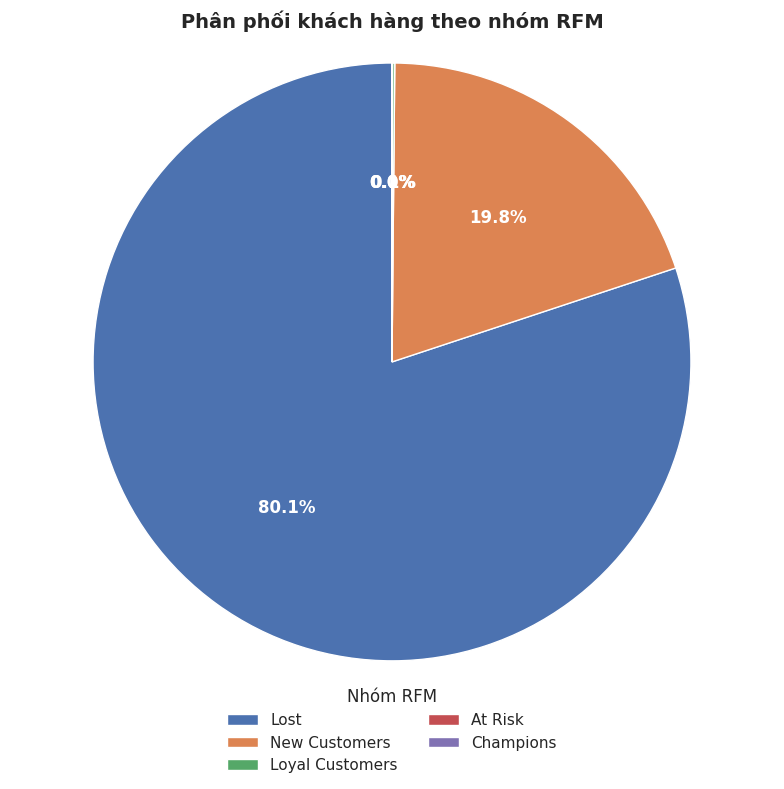

In [300]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân phối khách hàng theo nhóm RFM
rfm_group_counts = rfm['RFM_Group'].value_counts().reset_index()
rfm_group_counts.columns = ['RFM_Group', 'count']

labels = rfm_group_counts['RFM_Group']
sizes = rfm_group_counts['count']


fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    radius=0.5,
    textprops=dict(color="white", weight='bold')
)


plt.legend(
    wedges, labels,
    title="Nhóm RFM",
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)


plt.title('Phân phối khách hàng theo nhóm RFM', fontsize=14, weight='bold', loc='center')
plt.axis('equal') 
plt.tight_layout()
plt.show()


- Khách hàng rời bỏ chiếm đa số áp đảo, chiếm hơn 80% trong tổng số khách hàng. Đây là nhóm lớn nhất và cho thấy một vấn đề nghiêm trọng trong việc giữ chân khách hàng. Tỉ lệ khách hàng rời bỏ là cực kì cao.
- Mặc dù thu hút được một lượng tương đối khách hàng mới (~20% khách hàng là người mới) nhưng vấn đề là họ không được chuyển tiếp sang nhóm trung thành, vì tỉ lệ Royal và Champions là rất thấp.
- Số lượng "Loyal Customers" và "Champions" là vô cùng bé và không đáng kể so với tổng số lượng khách hàng. Điều này cho thấy Olist đang thất bại nặng nề trong việc khuyến khích khách hàng mua lại và xây dựng một tệp khách hàng cốt lõi.
- Trong bối cảnh tỉ lệ "Lost" khổng lồ, số lượng khách hàng trong nhóm "At Risk" dường như không đáng kể (chỉ chiếm 0.0015% trong tổng số khách hàng). Có thể chỉ ra rằng, khách hàng đang rời bỏ Olist rất nhanh chóng, thậm chí không trải qua giai đoạn "có nguy cơ rời bỏ" một cách rõ rệt để có thể can thiệp.

## 5. Tổng kết & Kết luận

#### **5.1. Tổng kết**
**Thách thức trong việc giữ chân khách hàng:**
- Hầu hết các khách hàng chỉ thực hiện một giao dịch duy nhất rồi rời bỏ.
- Mặc dù thể hiện được khả năng thu hút khách hàng mới tốt tuy nhiên tỉ lệ chuyển đổi những khách hàng này thành khách hàng trung thành là cực kì thấp.

**Thời gian và chất lượng giao hàng là yếu tố quan trọng quyết định sự hài lòng:**
- Thời gian giao hàng ảnh hưởng trực tiếp đến đánh giá của khách hàng. Thời gian giao hàng trung bình là 12 ngày. Các đơn hàng có thời gian giao hàng dưới 15 ngày có điểm đánh giá trung bình khá cao (4.3/5) trong khi đó các đơn hàng giao trên 1 tháng có chỉ đạt trung bình 2.24/5
- Các khách hàng ở SP thường nhận được đơn đặt hàng của mình trong thời gian sớm nhất và họ khá hài lòng về điều đó. Trong khi đó, ở các khu vực xa hơn thường có thời gian giao hàng lâu hơn làm ảnh hưởng trực tiếp đến trải nghiệm mua hàng của khách hàng.

**Đặc điểm hành vi mua sắm của khách hàng:**
- Khách hàng có xu hướng đặt hàng nhiều nhất vào các ngày trong tuần (đặc biệt là thứ Hai) và vào các khung giờ chiều/tối.
- Phần lớn khách hàng chỉ mua một sản phẩm duy nhất trong mỗi đơn hàng.
- Danh mục "bed_bath_table" là danh mục phổ biến được mua nhiều nhất, đem lại doanh thu cao chỉ sau "health_beauty".

#### **5.2. Kết luận và Khuyến nghị**
Olist đang thực hiện rất tốt trong việc thu hút khách hàng mới. Tuy nhiên thách thức lớn nhất hiện nay là tỉ lệ khách hàng rời bỏ sau lần mua đầu tiên rất cao, cho thất vấn đề nghiêm trọng trong việc giữ chân khách hàng. Thời gian giao hàng kéo dài và trải nghiệm giao hàng chưa tối ưu được xác định là một trong những yếu tố chính ảnh hưởng tiêu cực đến sự hài lòng và lòng trung thành của khách hàng.

Để giải quyết những thách thức và thúc đẩy tăng trưởng bên vững, cần tập trung vào các lĩnh vực sau:
- Ưu tiên cải thiển trải nghiệm khách hàng và tăng cường giữ chân: Tối ưu hóa quy trình và thời gian giao hàng; Xây dựng và triển khai các chương trình khách hàng thân thiết; Nâng cao chất lượng chăm sóc sau bán hàng; ...
- Triển khai chiến lược sản phẩm và marketing thông minh hơn: Tập trung vào các danh mục có AOV cao và tiềm năng tăng trưởng; Khuyến khích khách hàng mua nhiều sản phẩm hơn trong một đơn hàng; Tận dụng hiệu quả các thời điểm mua sắm cao điểm; ...